# Comparison between the genders for the ages and types

Questions

- What are the differences between the gender for the different combinations of ages and types?
- Do we observe the same changes as globally?

# Loads

## Libraries and functions

In [ ]:
source("install_libraries.R")

In [34]:
source("load_libraries.R")

Allowing multi-threading with up to 4 threads.


preparing gene to GO mapping data...
preparing IC data...
preparing gene to GO mapping data...
preparing IC data...
preparing gene to GO mapping data...
preparing IC data...


In [35]:
source("functions.R")

## Data

In [36]:
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [37]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [38]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

In [39]:
# Interactions between genders and ages (after controlling type)
M_F_SPF_8w = results(dge,contrast= c(0,1,0,0,0,0,0,0,0,0), alpha=0.05, test="Wald")
M_F_GF_8w = results(dge,contrast= c(0,1,0,0,0,0,0,1,0,0), alpha=0.05, test="Wald")
M_F_SPF_52w = results(dge,contrast= c(0,1,0,0,0,0,1,0,0,0), alpha=0.05, test="Wald")
M_F_GF_52w = results(dge,contrast= c(0,1,0,0,0,0,1,1,0,0), alpha=0.05, test="Wald")
M_F_SPF_104w = results(dge,contrast= c(0,1,0,0,0,1,0,0,0,0), alpha=0.05, test="Wald")
M_F_GF_104w = results(dge,contrast= c(0,1,0,0,0,1,0,1,0,0), alpha=0.05, test="Wald")

In [40]:
to_comp = c("M VS F (SPF, 8w)", "M VS F (GF, 8w)", "M VS F (SPF, 52w)", "M VS F (GF, 52w)", "M VS F (SPF, 104w)", "M VS F (GF, 104w)")

# Stats

In [41]:
# Stats
gender_type_age_stats = matrix(0, nrow=6, ncol=3)
rownames(gender_type_age_stats) = to_comp
colnames(gender_type_age_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
gender_type_age_stats[1,] = get_stats_padj(M_F_SPF_8w)
gender_type_age_stats[2,] = get_stats_padj(M_F_GF_8w)
gender_type_age_stats[3,] = get_stats_padj(M_F_SPF_52w)
gender_type_age_stats[4,] = get_stats_padj(M_F_GF_52w)
gender_type_age_stats[5,] = get_stats_padj(M_F_SPF_104w)
gender_type_age_stats[6,] = get_stats_padj(M_F_GF_104w)
gender_type_age_stats

Wald padj < 0.05 LFC > 0 (Wald padj < 0.05)
M VS F (SPF, 8w)   2462             1291                      
M VS F (GF, 8w)    2730             1419                      
M VS F (SPF, 52w)  3459             1735                      
M VS F (GF, 52w)   3346             1689                      
M VS F (SPF, 104w)  290              148                      
M VS F (GF, 104w)    95               40                      
                   LFC < 0 (Wald padj < 0.05)
M VS F (SPF, 8w)   1171                      
M VS F (GF, 8w)    1311                      
M VS F (SPF, 52w)  1724                      
M VS F (GF, 52w)   1657                      
M VS F (SPF, 104w)  142                      
M VS F (GF, 104w)    55

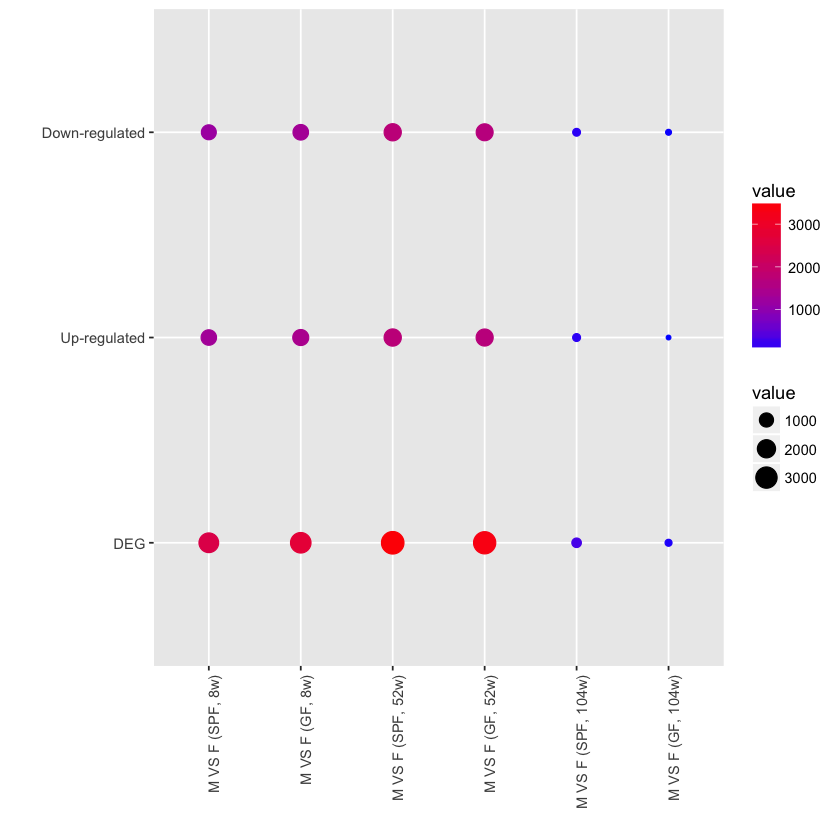

In [42]:
plot_stat_mat(gender_type_age_stats)

# Differentially expressed genes

In [43]:
gender_age_type_data = list(M_F_SPF_8w, M_F_GF_8w, M_F_SPF_52w, M_F_GF_52w, M_F_SPF_104w, M_F_GF_104w)
names(gender_age_type_data) = to_comp
gender_age_type_deg = extract_diff_expr_genes(gender_age_type_data, "gender-effect/gender_type_age/")

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”

# Comparison of the numbers per ages

Differentially expressed genes

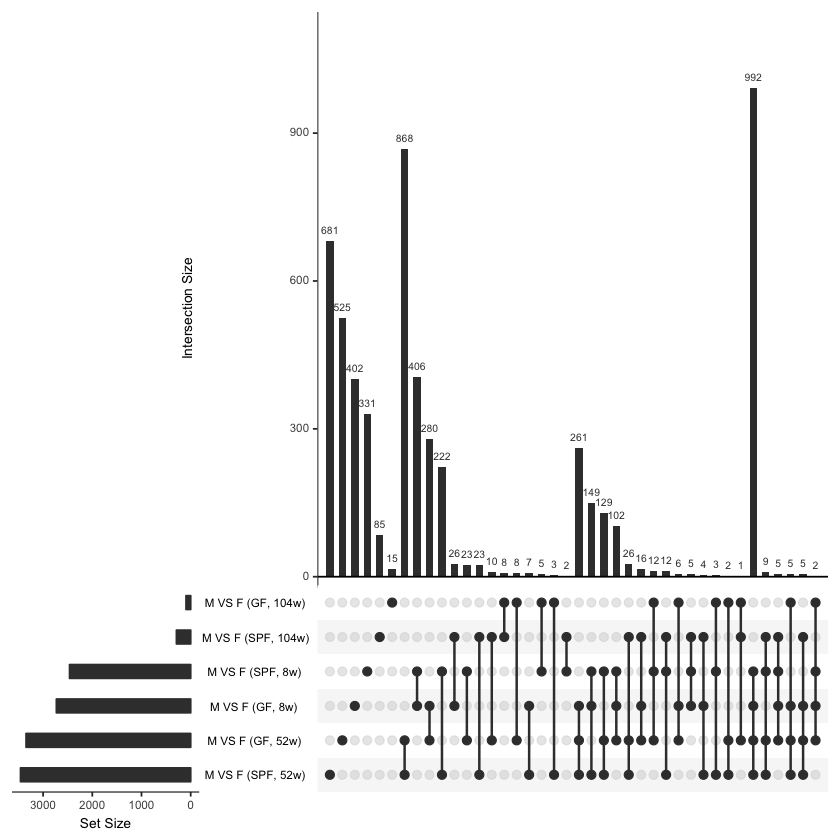

In [44]:
# Differentially expressed genes
upset(as.data.frame(gender_age_type_deg$deg), nsets = 7)

# DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated

Age | SPF | GF
--- | --- | ---
8w | M vs F | M vs F
52w | M vs F | M vs F
104w | M vs F | M vs F

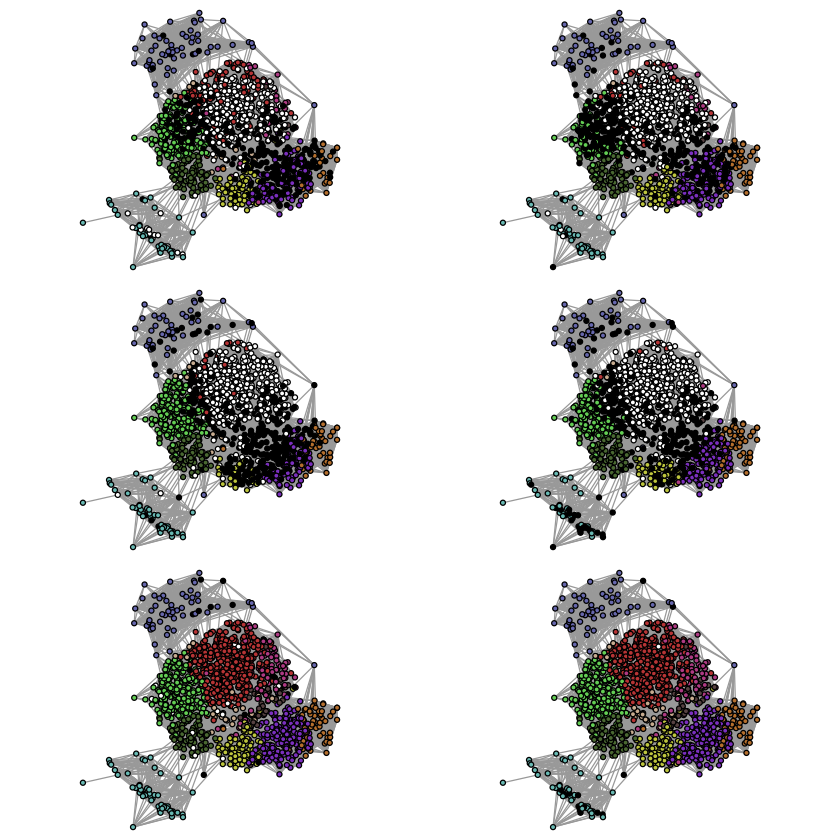

In [45]:
par(mfrow=c(3,2),mar=c(0,0,0,0))
col_M_vs_F_8w_SPF = get_deg_colors(gender_age_type_deg, to_comp[1], connected_gene_colors, module_nb)
plot_net_with_layout(net, col_M_vs_F_8w_SPF, pal2, layout, add_legend = FALSE)
col_M_vs_F_8w_GF = get_deg_colors(gender_age_type_deg, to_comp[2], connected_gene_colors, module_nb)
plot_net_with_layout(net, col_M_vs_F_8w_GF, pal2, layout, add_legend = FALSE)
col_M_vs_F_52w_SPF = get_deg_colors(gender_age_type_deg, to_comp[3], connected_gene_colors, module_nb)
plot_net_with_layout(net, col_M_vs_F_52w_SPF, pal2, layout, add_legend = FALSE)
col_M_vs_F_52w_GF = get_deg_colors(gender_age_type_deg, to_comp[4], connected_gene_colors, module_nb)
plot_net_with_layout(net, col_M_vs_F_52w_GF, pal2, layout, add_legend = FALSE)
col_M_vs_F_104w_SPF = get_deg_colors(gender_age_type_deg, to_comp[5], connected_gene_colors, module_nb)
plot_net_with_layout(net, col_M_vs_F_104w_SPF, pal2, layout, add_legend = FALSE)
col_M_vs_F_104w_GF = get_deg_colors(gender_age_type_deg, to_comp[6], connected_gene_colors, module_nb)
plot_net_with_layout(net, col_M_vs_F_104w_GF, pal2, layout, add_legend = FALSE)

# GO analysis

In [46]:
full_go_desc = gender_age_type_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = gender_age_type_deg$GO_wall[[1]][,"category"]
comp = colnames(gender_age_type_deg$over_represented_GO)
comp = comp[4:length(comp)]

## Biological process

Dot-plot with the most over-represented BP GO (20 most significant p-values for the different comparison)

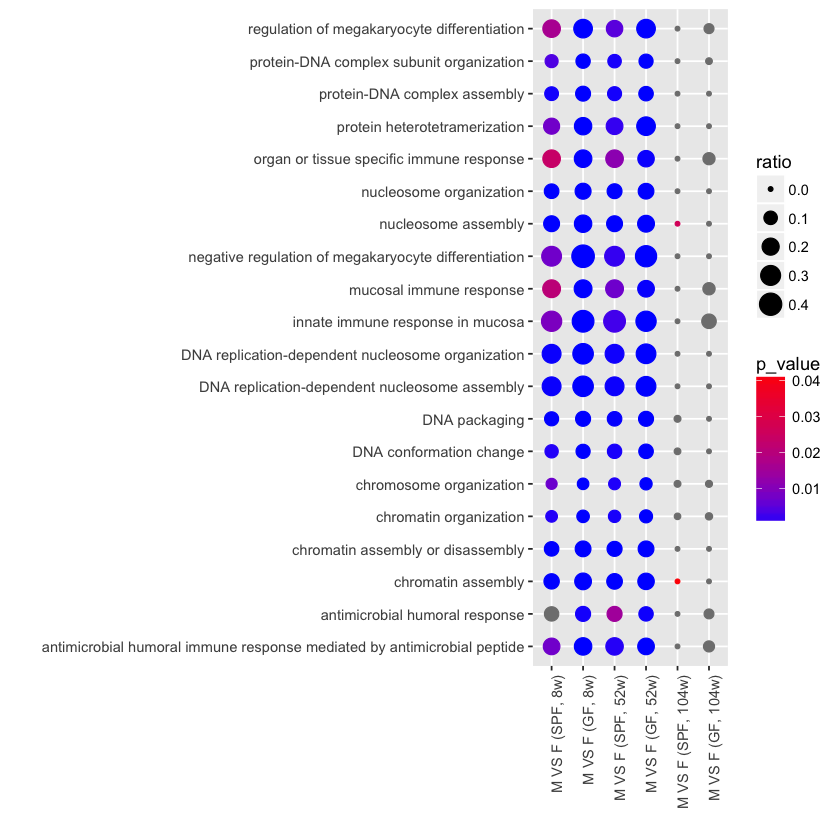

In [47]:
plot_top_go(gender_age_type_deg$over_represented_GO,
            gender_age_type_deg$GO_wall,
            "BP",
            comp,
            20)

Network based on description similarity

In [48]:
BP_network = create_GO_network(gender_age_type_deg, "BP", BP_GO)

Age | SPF | GF
--- | --- | ---
8w | M vs F | M vs F
52w | M vs F | M vs F
104w | M vs F | M vs F

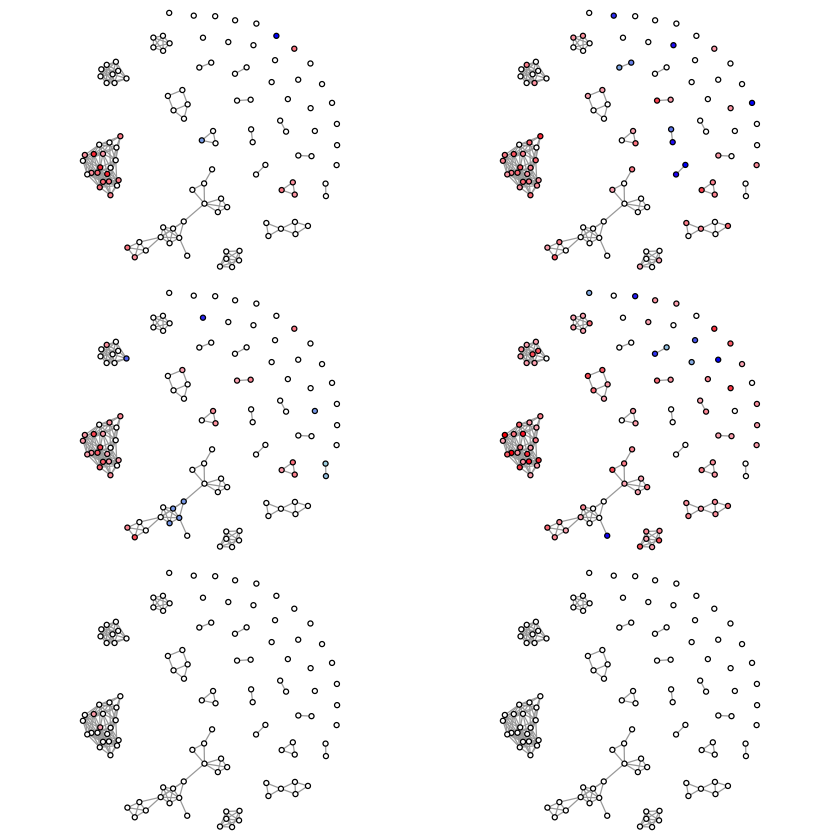

In [49]:
par(mfrow=c(3,2),mar=c(0,0,0,0))
plot_GO_networks(BP_network, to_comp[1], full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, to_comp[2], full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, to_comp[3], full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, to_comp[4], full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, to_comp[5], full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, to_comp[6], full_go_desc, plot_interactive = FALSE)

M VS F (SPF, 8w)

In [50]:
# M VS F (SPF, 8w)
plot_GO_networks(BP_network, to_comp[1], full_go_desc, plot_non_interactive = F)

HTML widgets cannot be represented in plain text (need html)

M VS F (GF, 8w)

In [51]:
# M VS F (GF, 8w)
plot_GO_networks(BP_network, to_comp[2], full_go_desc, plot_non_interactive = F)

HTML widgets cannot be represented in plain text (need html)

M VS F (SPF, 52w)

In [52]:
# M VS F (SPF, 52w)
plot_GO_networks(BP_network, to_comp[3], full_go_desc, plot_non_interactive = F)

HTML widgets cannot be represented in plain text (need html)

M VS F (GF, 52w)

In [53]:
# M VS F (GF, 52w)
plot_GO_networks(BP_network, to_comp[4], full_go_desc, plot_non_interactive = F)

HTML widgets cannot be represented in plain text (need html)

M VS F (SPF, 104w)

In [54]:
# M VS F (SPF, 104w)
plot_GO_networks(BP_network, to_comp[5], full_go_desc, plot_non_interactive = F)

HTML widgets cannot be represented in plain text (need html)

M VS F (GF, 104w)

In [55]:
# M VS F (GF, 104w)
plot_GO_networks(BP_network, to_comp[6], full_go_desc, plot_non_interactive = F)

HTML widgets cannot be represented in plain text (need html)

## Cellular components

Dot-plot with the most over-represented CC GO (20 most significant p-values for the different comparison)

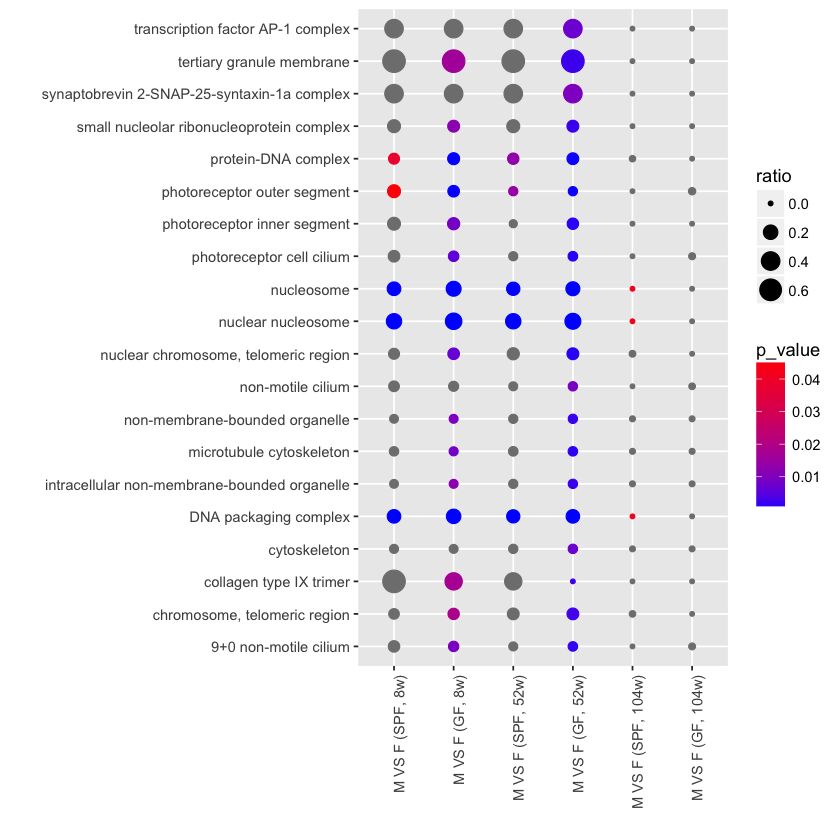

In [56]:
plot_top_go(gender_age_type_deg$over_represented_GO,
            gender_age_type_deg$GO_wall,
            "CC",
            comp,
            20)

## Molecular functions

Dot-plot with the most over-represented MF GO (20 most significant p-values for the different comparison)

Warning message:
“Removed 6 rows containing missing values (geom_point).”

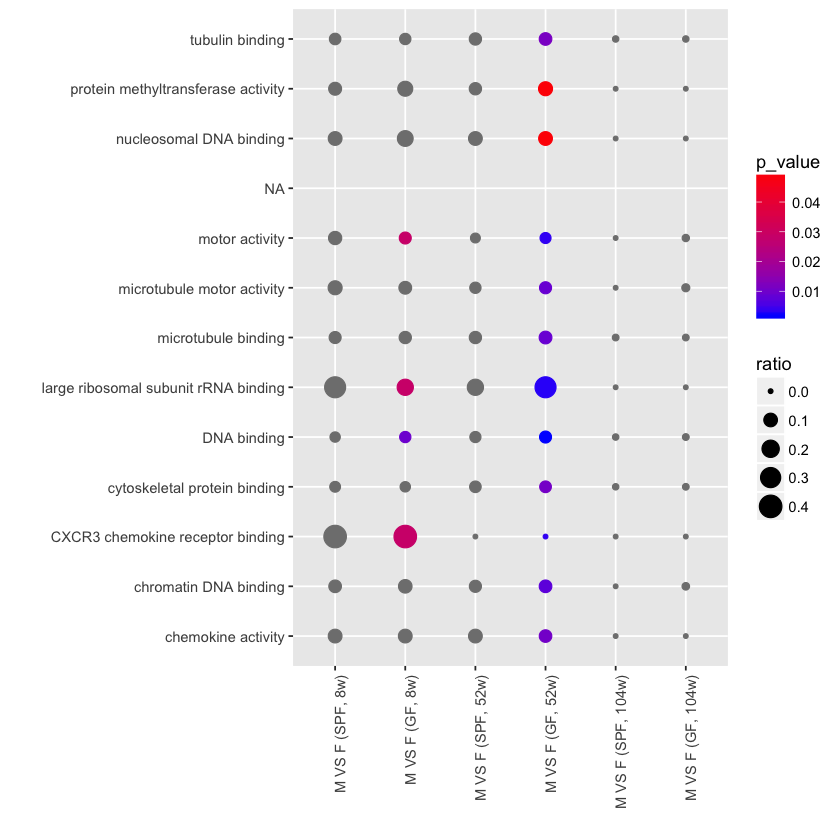

In [57]:
plot_top_go(gender_age_type_deg$over_represented_GO,
            gender_age_type_deg$GO_wall,
            "MF",
            comp,
            20)

# KEGG pathways

In [58]:
plot_kegg_pathways(gender_age_type_deg$over_represented_KEGG[,"category"],
                   gender_age_type_deg$fc_deg,
                   "../results/dge/gender-effect/gender_type_age/over_repr_kegg/")

[1] "Note: 17 of 5736 unique input IDs unmapped."
[1] "Note: 17 of 5736 unique input IDs unmapped."


Pathway graphs available at ../results/dge/type-effect/type_gender_age/over_repr_kegg/

In [59]:
plot_kegg_pathways(gender_age_type_deg$under_represented_KEGG[,"category"],
                   gender_age_type_deg$fc_deg,
                   "../results/dge/gender-effect/gender_type_age/under_repr_kegg/")

[1] "Note: 17 of 5736 unique input IDs unmapped."


Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling '

  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$c

limit_output extension: Maximum message size of 10000 exceeded with 10040 characters

Pathway graphs available at ../results/dge/type-effect/type_gender_age/under_repr_kegg/